# Parameters

Notebook for Parameters notes and exercise

Ultimately the goal of any machine learning model is to be able to predict as accurately as possible an output (y) based on a given input (x). The objective is to fit a regression line to the known data where x is the inpedendant variable and y is the dependant variable based on some function of x. By evaluating a best fit function for x it allows for any value of y to be predicted to a degree of accuracy. 


1. What are parameters <br>
(https://www.geeksforgeeks.org/difference-between-model-parameters-vs-hyperparameters/)<br>
(https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/#:~:text=What%20is%20a%20Model%20Parameter,the%20model%20on%20your%20problem)

- In an equation such as y = 4x + 2, the "4" represents the slope of the line (m), i.e. for each successive value of x, y is 4 times that. the "2" in the equation represents where on the y axis the line crosses when x = 0, in this case 2 , or c. In this simple example the equation is the model, the 4 and 2 are the model parameters. 
- The challenge is given a set of data how to find the optimum parameters for the model function as these parameters have to be estimated from the data.

In [165]:
# Import the required libraries, numpy and matplotlib
import numpy as np

import matplotlib.pyplot as plt

### Section - Trying out the concepts of generating a value y based on an input x. 

In [166]:
# Generate some numbers for the x value
x = np.linspace(0,10,20)
x

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [167]:
# Make up a function for y to do some plotting and introduce some "noise" using the random.normal function. 
# This creates some level of variation in the value of output y. 
y = 6*x - 4 + np.random.normal(0,1,len(x))
y

array([-2.73120976, -1.53772985,  1.2609511 ,  3.99502193,  9.62988526,
       13.21608384, 16.03613976, 17.57273376, 19.77583449, 22.5958072 ,
       26.42211326, 29.86933167, 34.88021528, 37.81253902, 40.75067495,
       44.81198034, 47.00369177, 50.2454604 , 53.15623687, 55.6634525 ])

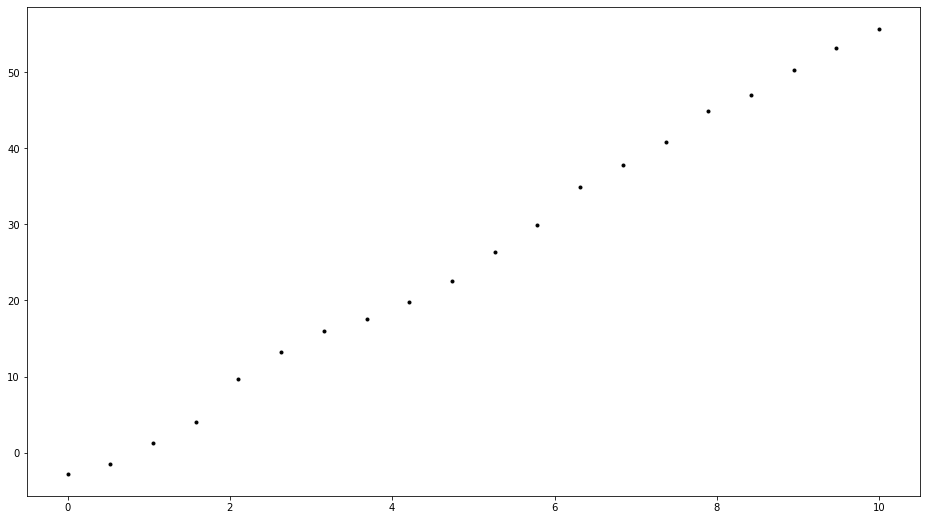

In [168]:
# Generate the plot to see what it looks like. 
fig,ax = plt.subplots(figsize=(16,9))

ax.plot(x,y,'k.')

As expected, an approximation of a linear relationship for y based on x. 

Now what if we did not know what the function was and only the data was available. 

How to evaluate the relationship between x and y. 

We use the np.polyfit function. (https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)
 format is numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
 The 3 most important parameters are x, y and degrees, x and y being the data and degrees the degree of fitting for the equation. 
 
Curve Fitting
 https://en.wikipedia.org/wiki/Curve_fitting#:~:text=A%20line%20will%20connect%20any,points%20with%20distinct%20x%20coordinates.&text=This%20will%20exactly%20fit%20a%20simple%20curve%20to%20three%20points.&text=This%20will%20exactly%20fit%20four,will%20exactly%20fit%20four%20constraints
https://en.wikipedia.org/wiki/Overfitting
 https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5
This is an important topic as the degreee to which a model fits a regression line to the known data is a key factor in the models capability to predit outcomes. Overfitting means that all data points are connected including variations (noise) that are not in fact part of the real underlying model. 

On the flip side underfitting means that the model proposed does not adequetely represent the underlying functional relationship between x and y and cannot provide a reliable or accurate prediction of y values.

In [169]:
# Use the np.polyfit function to generate the possible coefficients of x. 
# The resulting coefficients of x are close to the original function coefficients of 6 and -4
params = np.polyfit(x,y,1)
params

array([ 6.05867104, -4.27189453])

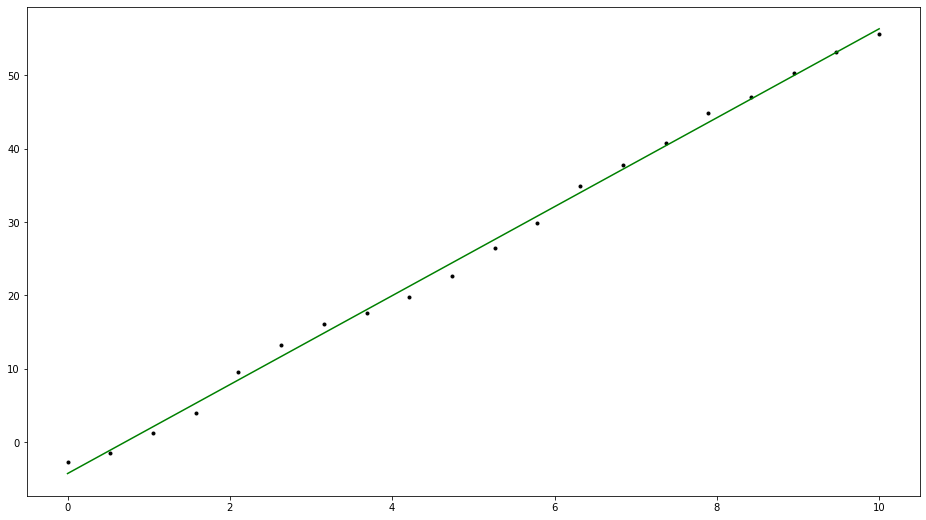

In [170]:
# Plot the original set of data and the line repesenting a best fit using the polyfit coefficients. 
# From a visual inspection the line derived from the polyfit fucntionlooks to be a goof fit.
fig,ax = plt.subplots(figsize=(16,9))

# Plot original data
ax.plot(x,y,'k.')

# Plot the data based on the polyfit output.
ax.plot(x, np.polyval(params,x) ,'g-')


## Exercise on the 2 data sets. 

In [172]:
# Data Set 1
x1 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
y1 = [1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7]

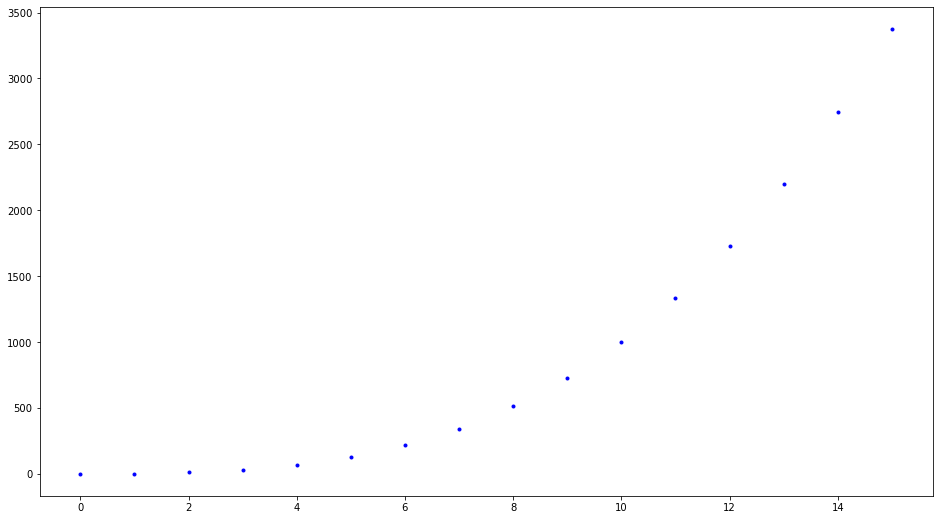

In [173]:
fig,ax = plt.subplots(figsize=(16,9))

ax.plot(x1,y1,'b.')


In [174]:
degree = 3
params1 = np.polyfit(x1,y1,degree)
params1

array([ 0.99699366,  0.07781416, -0.50388419,  1.22298762])

In [175]:
y_fit = np.polyval(params1, x1)
y_fit

array([1.22298762e+00, 1.79391125e+00, 8.50242518e+00, 2.73304914e+01,
       6.42600718e+01, 1.25273129e+02, 2.16351623e+02, 3.43477518e+02,
       5.12632776e+02, 7.29799357e+02, 1.00095922e+03, 1.33209434e+03,
       1.72918667e+03, 2.19821816e+03, 2.74517079e+03, 3.37602652e+03])

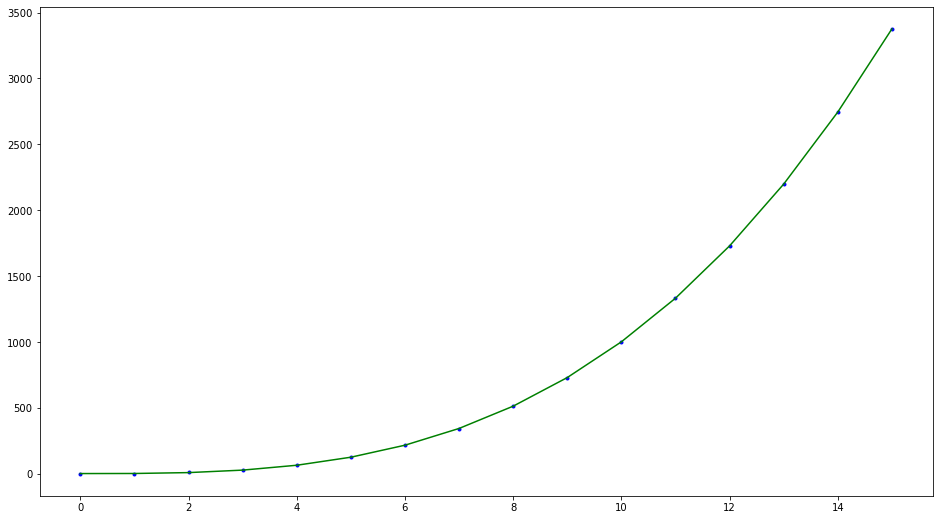

In [176]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(x1, y1, 'b.')

ax.plot(x1, y_fit,'g-')

#ax.plot(x1, params1[0]*x1**3 + params1[1]*x1**2 + params1[2]*x1 + params1[3], 'g-')

In [177]:
x2 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
y2 = [5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6]

In [185]:
degree = 1
params2 = np.polyfit(x2,y2,degree)
params2

array([ 16228.18846154, -48786.91538462])

In [186]:
y_fit = np.polyval(params2, x2)
y_fit

array([-4.87869154e+04, -3.25587269e+04, -1.63305385e+04, -1.02350000e+02,
        1.61258385e+04,  3.23540269e+04,  4.85822154e+04,  6.48104038e+04,
        8.10385923e+04,  9.72667808e+04,  1.13494969e+05,  1.29723158e+05,
        1.45951346e+05])

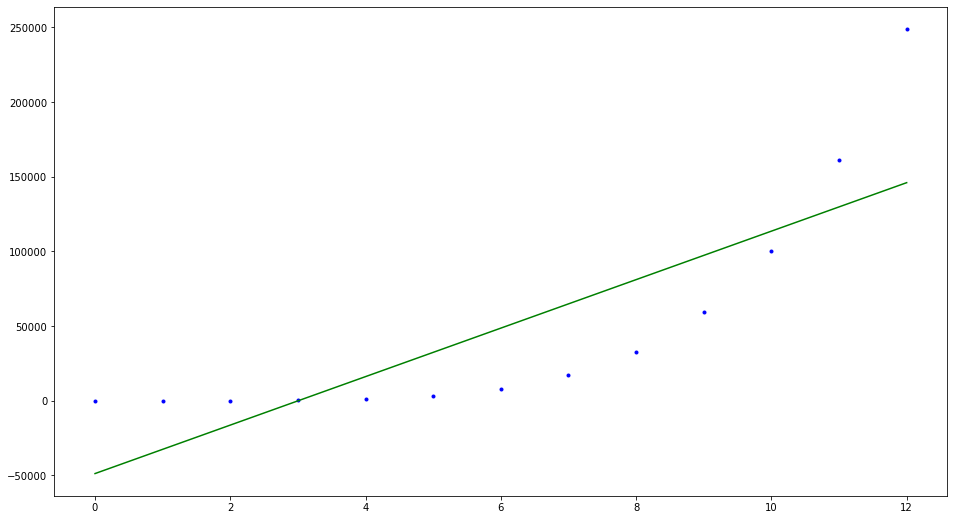

In [187]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(x2, y2, 'b.')

ax.plot(x2, y_fit,'g-')